<a href="https://colab.research.google.com/github/nedokormysh/Stepik_AI_Education_Linear_algorithms/blob/week_4/AI_edu_hw_04_GD_hometask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Градиентный спуск

Сгенерируем выборку для задачи регрессии и визуализируем данные

(100,)
(100, 1)


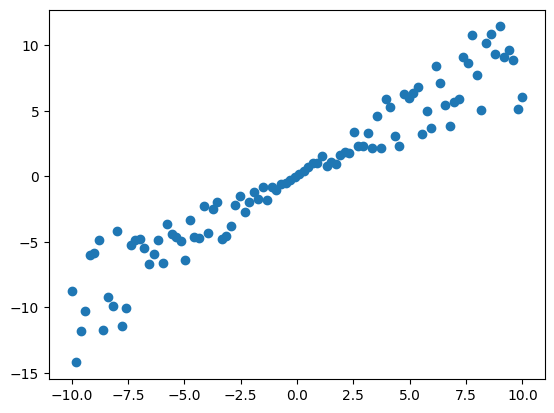

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

np.random.seed(42)

X = np.linspace(-10,10,100)

print(X.shape)

y = X * (np.random.random_sample(len(X)) + 0.5)
X = X.reshape(len(X), 1)

print(X.shape)

plt.scatter(X, y)

Реализуем метод градиентного спуска для обучения линейной регрессии.

Сначала напишем функцию для вычисления среднеквадратичной ошибки

$MSE = \frac{1}{m}||Xw - y||^2_2$.

Здесь квадратичная ошибка записана в матричном виде, т.е. $X$ - матрица объект-признак, $w$ - вектор весов модели.
*  $Xw$ - вектор предсказания модели
*  $y$ - вектор правильных ответов,
и квадратичная ошибка - это квадрат нормы разности вектора предсказания и вектора правильных ответов.

Вычислить норму вектора в python можно разными способами. Здесь мы  воспользуемся готовой функцией из библиотеку numpy - numpy.linalg.norm.

In [ ]:
import numpy as np

def compute_cost(X, y, theta):
    m = len(y)

    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

Реализуем градиентный спуск по формуле

$$w_{new} = w_{prev} - \eta\nabla_w Q(w_{prev})$$

Вычислим градиент MSE:
$$\nabla_w Q(w)=\frac2m X^T(Xw-y).$$

Итак, реализуем метод градиентного спуска:

*  первым шагом добавим к матрице $X$ единичный столбец - это константный признак, равный 1 на всех объектах. Он нужен, чтобы записать предсказание линейной регрессии в виде скалярного произведения и тем самым избавиться от знака суммы:
$a(x)=w_0+w_1x_1+...+w_dx_d=w_1\cdot 1+w_1x_1+...w_dx_d=(w,x)$

В python скалярное произведение можно записать так: $w@x$

*  затем инициализируем случайным образом вектор весов params

*  зададим пустой массив cost_track, в который будем записывать ошибку на каждой итерации

*  наконец, в цикле по количеству эпох (итераций) будем обновлять веса по формуле градиентного спуска

## Задание 1

Добавьте в функцию градиентного спуска из семинара L2-регуляризацию.

В этом случае градиент будет считаться по формуле

$$\nabla_w Q(w)=\frac2m (X^T(Xw-y)+\lambda w).$$

Добавьте в функцию `gradient_descent` гиперпараметр `lambda_`, задайте его по умолчанию равным нулю.

In [ ]:
X.shape

(100, 1)

In [ ]:
(X.shape[0], 1)

(100, 1)

In [ ]:
np.ones((X.shape[0]))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
np.hstack((np.ones((X.shape)), X)).shape

(100, 2)

In [ ]:
# def gradient_descent(X, y, learning_rate, iterations, ...):

#     # your code here

In [ ]:
def gradient_descent(X, y, learning_rate, iterations, lambda_=0):
    X = np.hstack((np.ones(X.shape), X))
    w = np.random.rand(X.shape[1])

    m = X.shape[0] # число объектов

    cost_track = np.zeros((iterations,1)) # массив с ошибками (MSE)
    err = []
    for i in range(1, iterations):

        w = w - 2 / m * learning_rate * (X.T @ ((X @ w) - y) + lambda_ * w)
        cost_track[i] = compute_cost(X, y, w)
        err.append(compute_cost(X, y, w))

    return err, w

In [ ]:
# def gradient_descent_v2(X: np.array, y: np.array, learning_rate: float, iterations: int, lambda_=0.0) -> np.array:

#      X = np.hstack((np.ones((X.shape[0], 1)), X)) #добавляем константный признак

#      m = X.shape[0] #вычисляем количество объектов
#      params = np.random.rand(X.shape[1]) #случайным образом инициализируем веса

#      errors = []

#      for i in range(0, iterations):

#           grad_mse = 2./m*((X.T @ (X @ params - y)) + lambda_*params)

#           params -= learning_rate*grad_mse

#           errors.append(compute_cost(X, y, params))

#      return errors, params

## Задание 2

Модифицируйте функцию из задания 1 так, чтобы она осуществляла стохастический градиентный спуск - назовите новую функцию `stochastic_gradient_descent` (она также должна учитывать регуляризацию).

* в стохастическом градиентном спуске на каждой итерации метода мы выбираем случайный объект - пусть это будет индекс случайного объекта `ind`

* затем применяем обычный градиентный спуск, но с условием, что градиент считается не по всем объектам, а только по объекту с индексом `ind`, поэтому в формуле для обновления весов должно произойти два изменения:
  - мы обращаемся не ко всей матрице `X`, а только к одному объекту.

  **Подсказка:** чтобы матричная запись не поменялась, мы можем объявить новую матрицу `X_ind = X[ind, :].reshape(-1,1)` и работать с ней.
  - при вычислении градиента по одному объекту делить результат на число объектов `m` не требуется.

In [ ]:
# def stochastic_gradient_descent(X, y, learning_rate, iterations, ...):

#     # your code here

In [ ]:
np.random.seed(42)
X_ = np.hstack((np.ones(X.shape), X))
X_ind = X_[5, :].reshape(-1,1)
y_ind = y[5]
w0 = np.random.rand(X_.shape[1],1)
# # # y_ind = y[[5]]
# # X_ind @ w.T
# # # X_ind.shape, w.shape
# w = w0
# w#, X_ind
w0

array([[0.37454012],
       [0.95071431]])

In [ ]:
def stochastic_gradient_descent(X, y, learning_rate, iterations, lambda_=0):
    X = np.hstack((np.ones((X.shape)), X))
    w = np.random.rand(X.shape[1])#.reshape(1,-1)
    err = []

    m = X.shape[0] # число объектов

    cost_track = np.zeros((iterations,1)) # массив с ошибками (MSE)

    for i in range(0, iterations):
        ind = np.random.randint(m)
        X_ind = X[ind, :].reshape(1,-1)
        y_ind = y[ind]

        w = w - 2 * learning_rate * (X_ind.T @ ((X_ind @ w) - y_ind) + lambda_ * w)

        err.append(compute_cost(X, y, w))

    return err, w

In [ ]:
# def stochastic_gradient_descent_v3(X: np.array, y: np.array, learning_rate: float, iterations: int, lambda_=0.0):

#     X = np.hstack((np.ones((X.shape[0], 1)), X))

#     params = np.random.rand(X.shape[1]) #.reshape(-1, 1)

#     errors = []

#     for i in range(0, iterations):

#         ind = np.random.randint(X.shape[0])

#         random_object_X = X[ind, :].reshape(1,-1)
#         random_object_y = y[ind]

#         grad_mse = 2*(random_object_X.T @ (random_object_X @ params - random_object_y) + lambda_*params)

#         params -= learning_rate*grad_mse

#         errors.append(compute_cost(X, y, params))

#     return errors, params

In [ ]:
# def stochastic_gradient_descent_v2(X, y, learning_rate, iterations, lambda_=0):
#     X = np.hstack((np.ones(X.shape), X))
#     w0 = np.random.rand(X.shape[1])


#     m = X.shape[0] # число объектов

#     w = w0

#     for i in range(1, iterations):
#         ind = np.random.randint(m)
#         X_ind = X[ind, :].reshape((1,2))
#         y_ind = y[ind]

#         w = w - 2 * learning_rate * (X_ind.T @ ((X_ind @ w) - y_ind) + lambda_ * w)

#     return w

Создадим функцию для получения предсказания модели

In [ ]:
def predict(X, params):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ params

## Вопрос 1

Примените функцию `gradient_descent` без регуляризации, с шагом 0.01 и 100 итерациями.

Чему равен наибольший вес модели? Ответ округлите до сотых.

In [ ]:
# your code here
cost, w = gradient_descent(X, y, .01, 100)

In [ ]:
round(abs(w.max()), 2)

0.97

## Вопрос 2

Примените функцию `gradient_descent` с коэффициентом регуляризации 1000, с шагом 0.01 и 100 итерациями.

Чему равен наибольший вес модели? Ответ округлите до сотых.

In [ ]:
# your code here

cost, w = gradient_descent(X, y, .01, 100, 1000)

In [ ]:
round(abs(w.max()), 2)

0.75

## Вопрос 3

Примените функцию `stochastic_gradient_descent` без регуляризации, с шагом 0.001 и 100 итерациями.

Чему равен наибольший вес модели? Ответ округлите до сотых.

In [ ]:
np.random.seed(42)

# your code here

cost, w = stochastic_gradient_descent(X, y, .001, 100)
round(abs(w.max()), 2)

1.0

## Вопрос 4

Примените функцию `stochastic_gradient_descent` с коэффициентом регуляризации 100, с шагом 0.001 и 100 итерациями.

Чему равен наибольший вес модели? Ответ округлите до сотых.

In [ ]:
np.random.seed(42)

# your code here

_, w = stochastic_gradient_descent(X, y, .001, 100, 100)
round(w.max(), 2)

0.25

## Вопрос 5

Нарисуйте ошибку в зависимости от номера итерации для GD и SGD на одной картинке. Используйте для обучения в обоих случаях `learning_rate=0.001, iterations=100, lambda_=0.`

Можно ли сказать, что оба графика монотонно убывают?

In [ ]:
cost_0, w = gradient_descent(X, y, .01, 100)

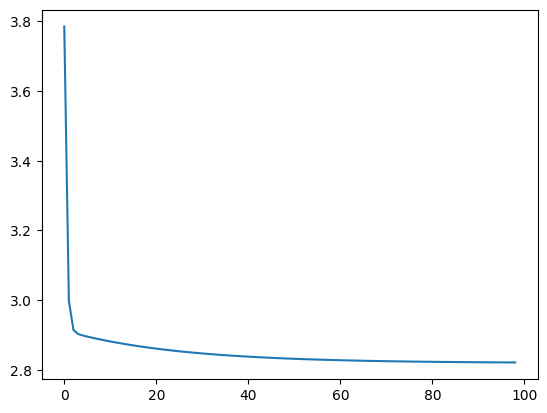

In [ ]:
plt.plot(cost_0)

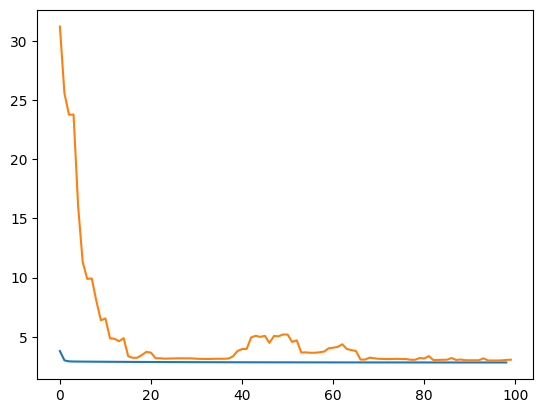

In [ ]:
cost_1, w = stochastic_gradient_descent(X, y, .001, 100)
plt.plot(cost_0)
plt.plot(cost_1)

## Задание (бонус, без проверки)

Реализуйте стохастический градиентный спуск с регуляризацией в виде класса. Протестируйте его.

In [ ]:
# your code here